## Проект 2.0 "Разведывательный анализ данных"

## Цели и задачи проекта

Суть одного из проектов UNICEF (международного подразделения ООН) — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Сделать это можно с помощью модели ML, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. 

Целью данного учебного проекта является проведение разведывательного анализа данных как подготовительного этапа для создания модели ML.

Для достижения поставленной цели необходимо выполнить следующие задачи:

- Провести первичный анализ и очистку данных.
- Провести корреляционный анализ числовых данных.
- Провести анализ номинативных переменных.
- По результатам анализа сделать выводы и подготовить датасет для дальнейшего использования.


## Этапы работы

Импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

Посмотрим на наш датасет в целом:

In [187]:
display(stud_math.head(50))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Датасет содержит 395 строк. Столбцов всего 30, из них 13 - числовые, 17 - строковые.
Только 3 столбца ('school', 'sex', 'age') не имеют пропусков данных.

# Первичный анализ данных в столбцах
Рассмотрим каждый из 30 столбцов по отдельности. При необходимости проведем очистку данных.

### school
Посмотрим, сколько школ содержит датасет.

In [188]:
pd.DataFrame(stud_math.school.value_counts())

,school
GP,349
MS,46


Всего две школы. Причем, в школе "GP" учится подавляющее количество учеников (88% от выборки). Данные чистые, без пропусков и ошибок ввода. Данные категориальные.

### sex
Определим соотношение полов учащихся:

In [189]:
a = pd.DataFrame(stud_math.sex.value_counts())
b = pd.DataFrame(stud_math.sex.value_counts(normalize=True))
display(a,b)

,sex
F,208
M,187


,sex
F,0.526582
M,0.473418


Видим незначительное преобладание женского пола (учениц примерно 53% от выборки). Данные чистые, без пропусков и ошибок ввода. Данные категориальные.

### age
Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение. 

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

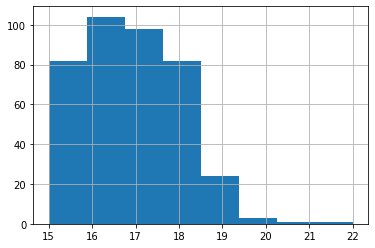

In [190]:
stud_math.age.hist(bins=8)
stud_math.age.describe()

Видим резкое снижение количества учеников после 18 лет. Может, уходят из школы ради работы? И что это за школы, где учатся аж до 22 лет? Посмотрим в числах: 

In [191]:
pd.DataFrame(stud_math.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Видим, что 21- и 22-летних учеников всего по одному.Несмотря на это, выбросами их не считаем, так как они вписываются в диапазон, указанный в задании (15-22 года). Таким образом, данные чистые, без пропусков и ошибок ввода. Данные числовые.

### address

Рассмотрим колонку с адресами:

In [192]:
stud_math.address.value_counts()

U    295
R     83
Name: address, dtype: int64

In [193]:
stud_math.address.value_counts(normalize=True)

U    0.780423
R    0.219577
Name: address, dtype: float64

In [194]:
stud_math.address.sort_values().unique()

array(['R', 'U', nan], dtype=object)

В выборке 78% городских школьников и 22% сельских. В данной колонке 17 пропусков данных.  Ошибок ввода нет. Данные категориальные.

## famsize

Посмотрим данные по размеру семьи:

In [195]:
stud_math.famsize

0      NaN
1      GT3
2      LE3
3      GT3
4      GT3
      ... 
390    LE3
391    LE3
392    GT3
393    LE3
394    LE3
Name: famsize, Length: 395, dtype: object

In [196]:
stud_math.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

In [197]:
stud_math.famsize.value_counts(normalize=True)

GT3    0.709239
LE3    0.290761
Name: famsize, dtype: float64

В выборке семьи разбиты на 2 группы: до 3-х человек включительно и более трех. Преобладают семьи в составе более трех человек (71%). В колонке 27 пропусков данных. Ошибок ввода нет. Данные категориальные.

## Pstatus

Посмотрим статус совместного жилья родителей: 

In [198]:
stud_math.Pstatus

0        A
1      NaN
2        T
3        T
4        T
      ... 
390      A
391      T
392      T
393      T
394      T
Name: Pstatus, Length: 395, dtype: object

In [199]:
stud_math.Pstatus.value_counts()

T    314
A     36
Name: Pstatus, dtype: int64

In [200]:
stud_math.Pstatus.value_counts(normalize=True)

T    0.897143
A    0.102857
Name: Pstatus, dtype: float64

В выборке подавляющее большинство учеников из семей, где родители живут вместе (почти 90%). Много пропусков данных: 45. Пропусков даже больше, чем семей, где родители живут раздельно (их 36). Ошибок ввода нет. Данные категориальные.

## Medu

Посмотрим образование матери:

In [201]:
stud_math.Medu

0      4.0
1      1.0
2      1.0
3      4.0
4      3.0
      ... 
390    2.0
391    3.0
392    1.0
393    3.0
394    1.0
Name: Medu, Length: 395, dtype: float64

In [202]:
stud_math.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

В колонке всего три пропуска данных. Больше всего матерей с высшим образованием (131). Без образования - всего три. Ошибок ввода нет. Данные формально числовые, но по смыслу - категориальные, пять уровней образования. 

## Fedu

Посмотрим образование отца:

In [203]:
stud_math.Fedu

0      4.0
1      1.0
2      1.0
3      2.0
4      3.0
      ... 
390    2.0
391    1.0
392    1.0
393    2.0
394    1.0
Name: Fedu, Length: 395, dtype: float64

In [204]:
stud_math.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

Есть один выброс: 40.0. Это явная опечатка с лишним нулем, заменим ее на 4.0:

In [205]:
stud_math.Fedu = stud_math.Fedu.apply(lambda x: 4.0 if x == 40.0 else x) 

Посмотрим снова:

In [206]:
stud_math.Fedu.value_counts()

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64

Визуально, у отцов уровень образования ниже, чем у матерей. В колонке много пропусков данных - 24. Больше всего отцов с образованием 5-9 классов (106). Без образования - всего два. Данные формально числовые, но по смыслу - категориальные, как и у матерей, пять уровней образования. 

## Mjob

Посмотрим работу матери:

In [207]:
stud_math.Mjob

0       at_home
1       at_home
2       at_home
3        health
4         other
         ...   
390    services
391    services
392       other
393    services
394       other
Name: Mjob, Length: 395, dtype: object

In [208]:
stud_math.Mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

В колонке 19 пропусков данных. Больше всего работ в категории 'other' - другое (133). Меньше всего матерей работают в сфере здравоохранения (32).  Ошибок ввода нет, все категории соответствуют описанию в задании. Данные категориальные, пять категорий.

## Fjob

Посмотрим работу отца:

In [209]:
stud_math.Fjob

0       teacher
1         other
2         other
3           NaN
4         other
         ...   
390    services
391    services
392       other
393       other
394     at_home
Name: Fjob, Length: 395, dtype: object

In [210]:
stud_math.Fjob.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

В колонке много пропусков данных - 36. Больше всего работ в категории 'other' - другое (197).Меньше всего отцов работают в сфере здравоохранения (15) и не работают (16). Ошибок ввода нет, все категории соответствуют описанию в задании. Данные категориальные, пять категорий, как и у матерей.

## reason

Посмотрим причины выбора школы:

In [211]:
stud_math.reason

0      course
1      course
2       other
3        home
4        home
        ...  
390    course
391    course
392    course
393    course
394       NaN
Name: reason, Length: 395, dtype: object

In [212]:
stud_math.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

В колонке довольно много пропусков данных - 17. Самый распространенный мотив выбора школы - образовательная программа (137). Меньше всего - "другое" (34). Ошибок ввода нет, все категории соответствуют описанию в задании. Данные категориальные, 4 категории.

## guardian

Посмотрим обстановку с опекунами:

In [213]:
stud_math.guardian

0      mother
1      father
2      mother
3      mother
4      father
        ...  
390       NaN
391    mother
392       NaN
393    mother
394    father
Name: guardian, Length: 395, dtype: object

In [214]:
stud_math.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

В колонке  много пропусков данных - 31. Подавляющее большинство опекунов - матери (250). В чем смысл понятия "мать-опекун"? Неясно. Меньше всего опекунов - "не-родителей" (28). Ошибок ввода нет, все категории соответствуют описанию в задании. Данные категориальные, 3 категории.

## traveltime

Посмотрим время в пути до школы:

In [215]:
stud_math.traveltime

0      2.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
390    1.0
391    2.0
392    1.0
393    3.0
394    1.0
Name: traveltime, Length: 395, dtype: float64

In [216]:
stud_math.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

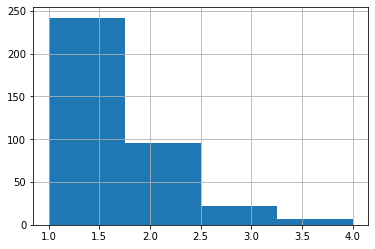

In [217]:
stud_math.traveltime.hist(bins=4)
stud_math.traveltime.describe()

В колонке много пропусков данных - 28. Больше всего учеников живут рядом со своей школой - 242 (время в пути <15 мин.). Только 7 человек тратит на дорогу более часа. Ошибок ввода нет, все категории соответствуют описанию в задании. Данные формально числовые, но по смыслу - категориальные, отражают 4 диапазона значений. 

## studytime

Посмотрим время на учёбу помимо школы в неделю:

In [218]:
stud_math.studytime

0      2.0
1      2.0
2      2.0
3      3.0
4      2.0
      ... 
390    2.0
391    1.0
392    1.0
393    1.0
394    1.0
Name: studytime, Length: 395, dtype: float64

In [219]:
stud_math.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

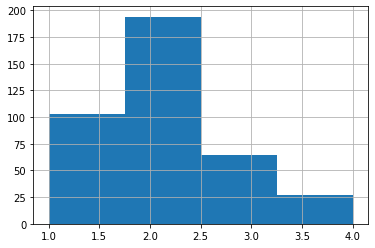

In [220]:
stud_math.studytime.hist(bins=4)
stud_math.studytime.describe()

В колонке не много пропусков данных - 7. Больше всего учеников (194) тратят на учёбу помимо школы от 2 до 5 часов в неделю. Самых прилежных мало - только 27 человек занимается более 10 часов. Ошибок ввода нет, все категории соответствуют описанию в задании. Данные формально числовые, но по смыслу - категориальные, так как отражают 4 диапазона значений. 

## failures

Посмотрим количество внеучебных неудач:

In [221]:
stud_math.failures

0      0.0
1      0.0
2      3.0
3      0.0
4      0.0
      ... 
390    2.0
391    0.0
392    3.0
393    0.0
394    0.0
Name: failures, Length: 395, dtype: float64

In [222]:
stud_math.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

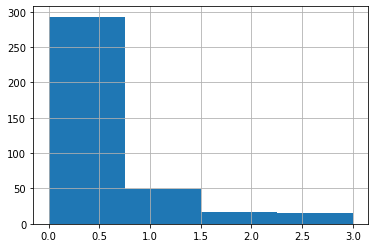

In [223]:
stud_math.failures.hist(bins=4)
stud_math.failures.describe()

В колонке много пропусков данных - 22. Больше всего в колонке нулевых значений (293). Исходя из описания в задании, трактовать каждое нулевое значение можно двояко: либо внеучебных неудач нет ("0"), либо неудач более трех. Ошибок ввода нет, все категории соответствуют описанию в задании. Данные числовые.

## schoolsup

Посмотрим дополнительную образовательную поддержку:

In [224]:
stud_math.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

In [225]:
stud_math.schoolsup.value_counts(normalize=True)

no     0.867876
yes    0.132124
Name: schoolsup, dtype: float64

В колонке не много пропусков данных - 9. Подавляющее большинство учеников (почти 87%) не имеют дополнительной образовательной поддержки.  Ошибок ввода нет, все категории соответствуют описанию в задании. Данные категориальные "да", "нет".

## famsup

Посмотрим семейную образовательную поддержку:

In [226]:
stud_math.famsup.value_counts()

yes    219
no     137
Name: famsup, dtype: int64

In [227]:
stud_math.famsup.value_counts(normalize=True)

yes    0.615169
no     0.384831
Name: famsup, dtype: float64

В колонке много пропусков данных - 39. Более половины семей (почти 62%) поддерживают своих учеников в учебе. Ошибок ввода нет, все категории соответствуют описанию в задании. Данные категориальные "да", "нет".

## paid

Посмотрим, как обстоят дела с финансированием учебы: дополнительные платные занятия по математике

In [228]:
stud_math.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

In [229]:
stud_math.paid.value_counts(normalize=True)

no     0.56338
yes    0.43662
Name: paid, dtype: float64

В колонке много пропусков - 40, т.е. 10% значений в данной категории отсутствуют. Не платят за репетиторство более половины (56%). Ошибок ввода нет, все категории соответствуют описанию в задании. Данные категориальные "да", "нет".

## activities

Посмотрим дополнительные внеучебные занятия:

In [230]:
stud_math.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

In [231]:
stud_math.activities.value_counts(normalize=True)

yes    0.511811
no     0.488189
Name: activities, dtype: float64

В колонке 14 пропусков данных. Немногом более половины учеников (51%) активничают помимо учебы. Учитывая пропуски данных (это около 3% значений столбца), активность и неактивность примерно одинаковы. Ошибок ввода нет, все категории соответствуют описанию в задании. Данные категориальные "да", "нет".

## nursery

Посмотрим детсадовское прошлое:

In [232]:
stud_math.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

In [233]:
stud_math.nursery.value_counts(normalize=True)

yes    0.791557
no     0.208443
Name: nursery, dtype: float64

В колонке 16 пропусков данных. Подавляющее большинство учеников (79%) посещали детский сад. Ошибок ввода нет, все категории соответствуют описанию в задании. Данные категориальные "да", "нет".

## studytime, granular

Рассмотрим стобец 'studytime, granular' вместе со 'studytime':

In [234]:
pd.DataFrame(stud_math[['studytime', 'studytime, granular']])

,studytime,"studytime, granular"
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


Визуально сразу можно определить, что показатель 'studytime, granular' получен путем умножения показателя 'studytime' на минус три. Зачем это было сделано - неясно, но для целей нашего исследования столбец 'studytime, granular' бесполезен, поэтому удалим его (даже не пытаясь посчитать корреляцию со 'studytime'):

In [235]:
stud_math.drop(['studytime, granular'], inplace = True, axis = 1)

## higher

Проверим планы учеников на дальнейшую учебу в ВУЗах:

In [236]:
stud_math.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

In [237]:
stud_math.higher.value_counts(normalize=True)

yes    0.949333
no     0.050667
Name: higher, dtype: float64

В колонке 20 пропусков данных. Супер-подавляющее большинство учеников (95%) хотят получить высшее образование. Ошибок ввода нет, все категории соответствуют описанию в задании. Данные категориальные "да", "нет".

## internet

Посмотрим наличие интернета дома:

In [238]:
stud_math.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

In [239]:
stud_math.internet.value_counts(normalize=True)

yes    0.844875
no     0.155125
Name: internet, dtype: float64

В колонке много пропусков данных - 34. Подавляющее большинство учеников (почти 85%) имеют дома интернет. Интересно, влияет ли отсутствие интернета у 15% учеников на успеваемость? Это ухудшает успеваемость из-за нехватки информации дома или наоборот, больше времени за книгами без соц.сетей полезнее? Возможно, на боксплотах будет видно разницу. Ошибок ввода нет, все категории соответствуют описанию в задании. Данные категориальные "да", "нет".

## romantic

Проверим романтические отношения:

In [240]:
stud_math.romantic.value_counts()

no     240
yes    124
Name: romantic, dtype: int64

In [241]:
stud_math.romantic.value_counts(normalize=True)

no     0.659341
yes    0.340659
Name: romantic, dtype: float64

В колонке 31 пропуск данных. Треть учеников состоит в романтических отношениях, две трети - нет. Ошибок ввода нет, все категории соответствуют описанию в задании. Данные категориальные "да", "нет".

## famrel

Посмотрим качество семейных отношений:

In [242]:
stud_math.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [243]:
stud_math.famrel.value_counts(normalize=True)

 4.0    0.494565
 5.0    0.269022
 3.0    0.168478
 2.0    0.046196
 1.0    0.019022
-1.0    0.002717
Name: famrel, dtype: float64

Есть один выброс: -1.0. На мой взгляд, это опечатка знака "минус", заменим ее на 1.0:

In [244]:
stud_math.famrel = stud_math.famrel.apply(lambda x: 1.0 if x == -1.0 else x) 

Посмотрим снова:

In [245]:
stud_math.famrel.value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

In [246]:
stud_math.famrel.value_counts(normalize=True)

4.0    0.494565
5.0    0.269022
3.0    0.168478
2.0    0.046196
1.0    0.021739
Name: famrel, dtype: float64

count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

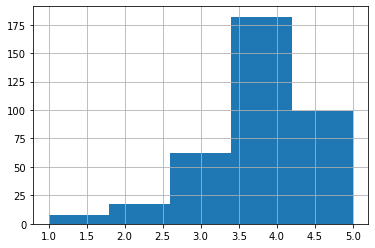

In [247]:
stud_math.famrel.hist(bins=5)
stud_math.famrel.describe()

В колонке 27 пропусков данных. Если предположить искренность в ответах учеников, то в большинстве семей отношения хорошие или очень хорошие (около 75%). Только у 2% учеников дела в семье плохи. Ошибок ввода нет, все категории соответствуют описанию в задании. Данные формально числовые, но по смыслу - категориальные, 5 оценок отношений.

## freetime

Проверим свободное время после школы:

In [248]:
stud_math.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

In [249]:
stud_math.freetime.value_counts(normalize=True)

3.0    0.398438
4.0    0.291667
2.0    0.164062
5.0    0.098958
1.0    0.046875
Name: freetime, dtype: float64

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

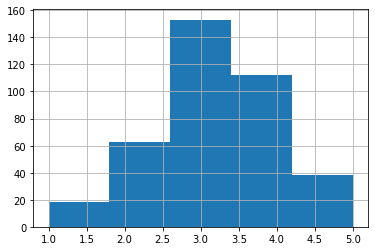

In [250]:
stud_math.freetime.hist(bins=5)
stud_math.freetime.describe()

В колонке 11 пропусков данных. В целом, свободного времени достаточно для большинства учеников. Оценки "слишком мало" и "слишком много" невелики, но есть смещение в сторону "слишком много". Ошибок ввода нет, все категории соответствуют описанию в задании. Данные формально числовые, но по смыслу - категориальные, 5 оценок времени.

## goout

Посмотрим оценку проведения времени с друзьями:

In [251]:
stud_math.goout.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

In [252]:
stud_math.goout.value_counts(normalize=True)

3.0    0.328165
2.0    0.260982
4.0    0.217054
5.0    0.134367
1.0    0.059432
Name: goout, dtype: float64

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

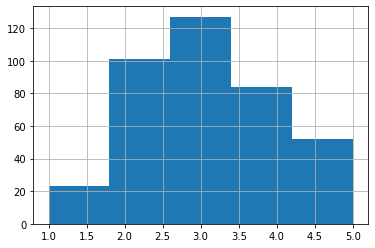

In [253]:
stud_math.goout.hist(bins=5)
stud_math.goout.describe()

В колонке 8 пропусков данных. В целом, оценки средние. Оценок "слишком много" вдвое больше, чем "слишком мало". Медиана практически совпадает со средним значением. Ошибок ввода нет, все категории соответствуют описанию в задании. Данные формально числовые, но по смыслу - категориальные, 5 оценок времени.

## health

Посмотрим на текущее состояние здоровья:

In [254]:
stud_math.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

In [255]:
stud_math.health.value_counts(normalize=True)

5.0    0.363158
3.0    0.234211
4.0    0.165789
1.0    0.123684
2.0    0.113158
Name: health, dtype: float64

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

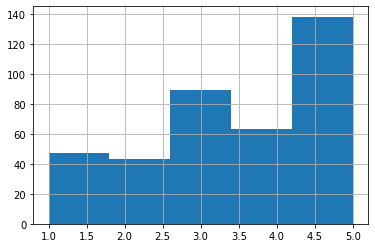

In [256]:
stud_math.health.hist(bins=5)
stud_math.health.describe()

В колонке 15 пропусков данных. Хоть и наблюдается смещение в сторону "очень хорошо", но в целом, данные тревожные: только у 36% со здоровьем "очень хорошо". "Очень плохо" и "Плохо" - 12% и 11% соответственно. Данные формально числовые, но по смыслу - категориальные, 5 оценок уровня здоровья.

## absences

Посмотрим прогулы:

In [257]:
stud_math.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

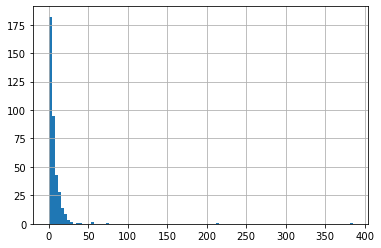

In [258]:
stud_math.absences.hist(bins=100)
stud_math.absences.describe()

В колонке 12 пропущенных значений. Похоже, есть выбросы. Проверим:

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [0, 20.0].


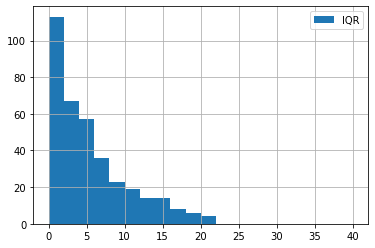

In [313]:
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=0, l=perc75 + 1.5*IQR))
# Нижнюю границу не берем 'perc25 - 1.5*IQR',
# а берем '0', так как количество прогулов не может быть меньше нуля
stud_math.absences.loc[stud_math.absences.between(
0, perc75 + 1.5*IQR)].hist(bins = 20, range = (0, 40), label = 'IQR')
 
plt.legend();

Посмотрим отдельно на подвыборку с потенциальными выбросами:

In [260]:
stud_math.absences.loc[stud_math.absences > 20].value_counts()

22.0     3
212.0    1
23.0     1
40.0     1
38.0     1
30.0     1
75.0     1
21.0     1
385.0    1
28.0     1
24.0     1
56.0     1
26.0     1
54.0     1
25.0     1
Name: absences, dtype: int64

In [261]:
stud_math.absences.loc[stud_math.absences > 20].value_counts().sum()

17

Итак, всего 17 прогульщиков выходят за границы выбросов. Причем, только 2 значения (212 и 385) явно выделяются. Это либо ошибки ввода, либо двое учеников, похоже, вообще не ходят в школу. Удалим эти два значения позже, после теста Стьюдента. Остальные 15 значений вполне могут быть реальными. В целом по выборке, посещаемость довольно хорошая: почти треть учеников вообще не пропускают занятия. У подавляющего болшинства не более 20 пропусков. И лишь 17 учеников (около 4%) имеют более 20 пропусков. Важно: в описании датасета не указано, за какой период считаются пропуски занятий (за год, семестр, месяц, неделю?). 20 пропусков в год или в месяц - большая разница. Данные числовые.

## score

Итак, самый главный - целевой столбец:

In [262]:
stud_math.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Очевидно, экзамен оцениваниется по 100-балльной шкале. Посмотрим распределение: 

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

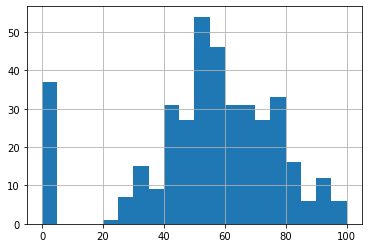

In [312]:
stud_math.score.hist(bins=20)
stud_math.score.describe()

В столбце 6 пропусков. Для целевого показателя пропуски необходимо удалить:

In [264]:
stud_math = stud_math.dropna(subset=['score'], axis = 0)

Средний балл - 52 (медиана - 55). На мой взгляд, довольно низкая успеваемость (если считать оценку на экзамене "удовлетворительно" - не менее 60 баллов, а "хорошо" - не менее 75 баллов). В выборке есть одно значение "0". Не считаем его выбросом, ученик реально мог получить 0 баллов.

# Корреляционный анализ

Выясним, какие числовые столбцы коррелируют с оценкой на экзамене. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 


In [266]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.146736,-0.152148,0.073146,-0.018227,0.205919,0.058768,0.016099,0.121115,-0.068103,0.096628,-0.155726
Medu,-0.146736,1.000000,0.621981,-0.165838,0.081032,-0.240319,-0.003697,0.038265,0.072320,-0.048331,-0.014047,0.213349
Fedu,-0.152148,0.621981,1.000000,-0.132036,0.017306,-0.273286,-0.016791,-0.017263,0.050997,0.018624,0.020970,0.130923
traveltime,0.073146,-0.165838,-0.132036,1.000000,-0.105910,0.049738,-0.032413,-0.026299,0.032629,-0.011724,-0.048242,-0.070559
studytime,-0.018227,0.081032,0.017306,-0.105910,1.000000,-0.181947,0.039899,-0.125066,-0.053831,-0.079180,-0.025707,0.115741
failures,0.205919,-0.240319,-0.273286,0.049738,-0.181947,1.000000,-0.021068,0.091608,0.107747,0.088013,0.058166,-0.344338
famrel,0.058768,-0.003697,-0.016791,-0.032413,0.039899,-0.021068,1.000000,0.171165,0.072291,0.089074,-0.082959,0.055305
freetime,0.016099,0.038265,-0.017263,-0.026299,-0.125066,0.091608,0.171165,1.000000,0.296338,0.064315,0.010745,0.019026
goout,0.121115,0.072320,0.050997,0.032629,-0.053831,0.107747,0.072291,0.296338,1.000000,-0.018026,-0.047954,-0.129685
health,-0.068103,-0.048331,0.018624,-0.011724,-0.079180,0.088013,0.089074,0.064315,-0.018026,1.000000,-0.016165,-0.070460


На матрице корреляций видно, что взаимной корреляции между признаками нет, исключать из рассмотрения нечего. Однако, с целевым признаком у всех остальных признаков корреляция крайне слабая.

# Анализ номинативных переменных

Построим боксплоты для всех переменных, в том числе и числовых. Кроме переменной 'age', все числовые переменные не являются истинно "числовыми". Они выражают либо диапазоны, либо числовые оценки качественных признаков. Для 'age' тоже построим боксплот для наглядности. Используем функцию:

In [311]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 6))
    sns.boxplot(x=column, y='score', data=stud_math, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

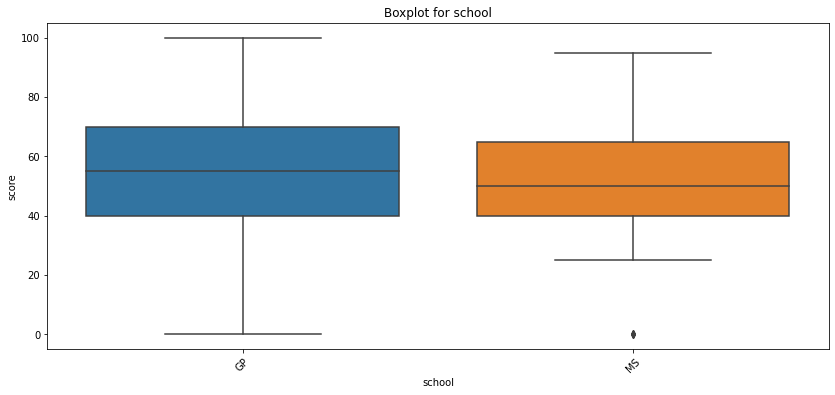

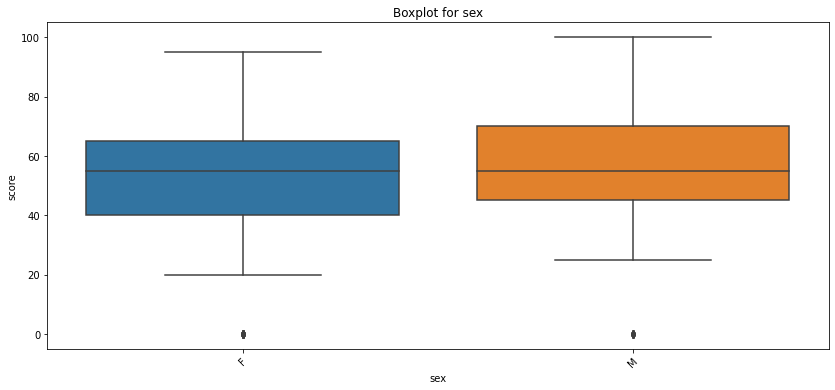

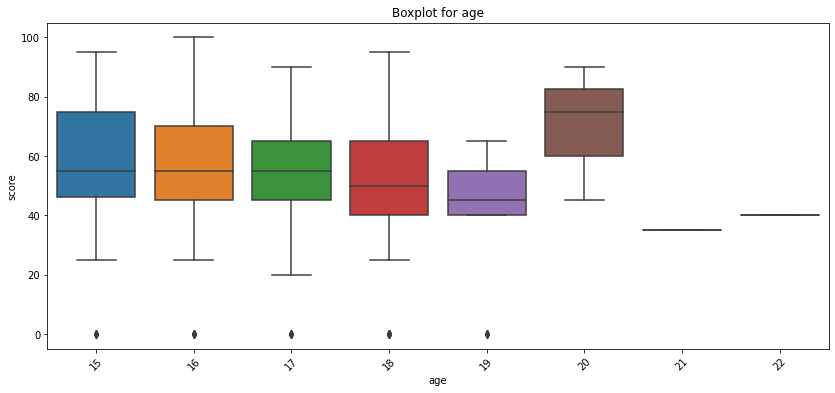

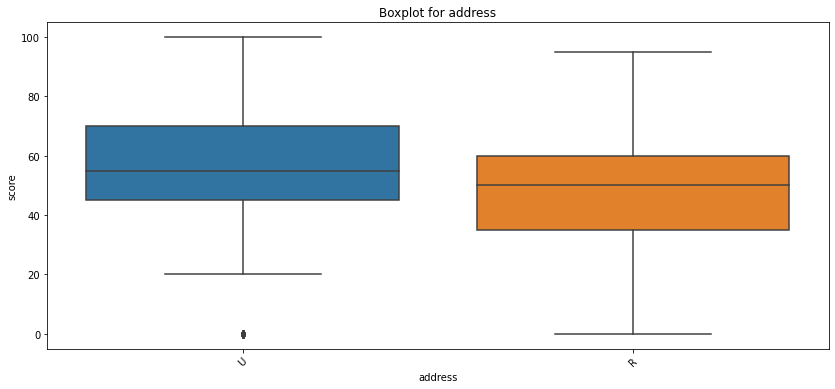

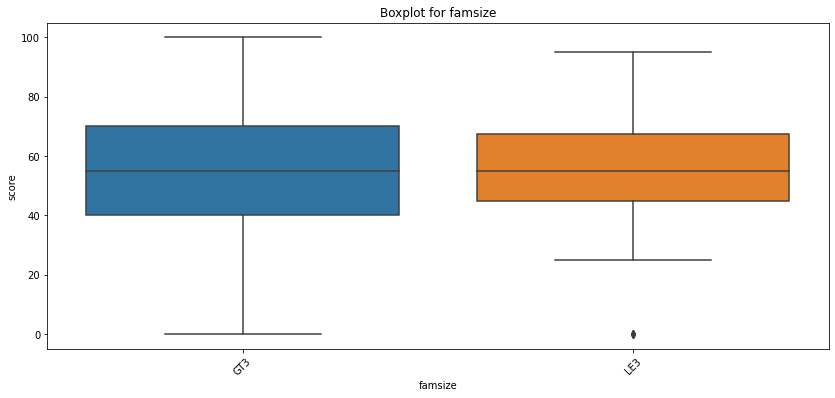

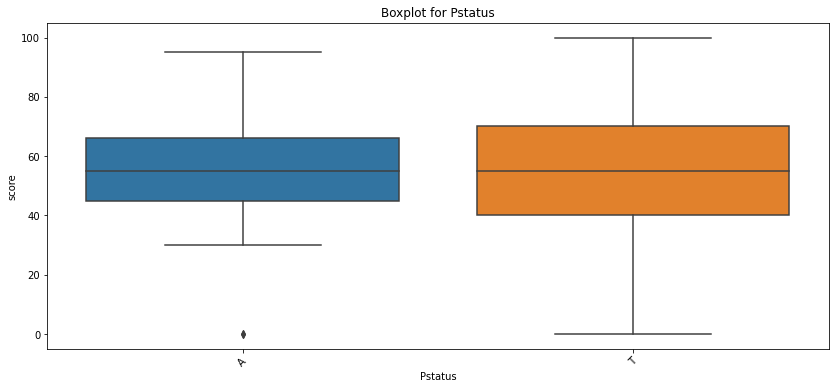

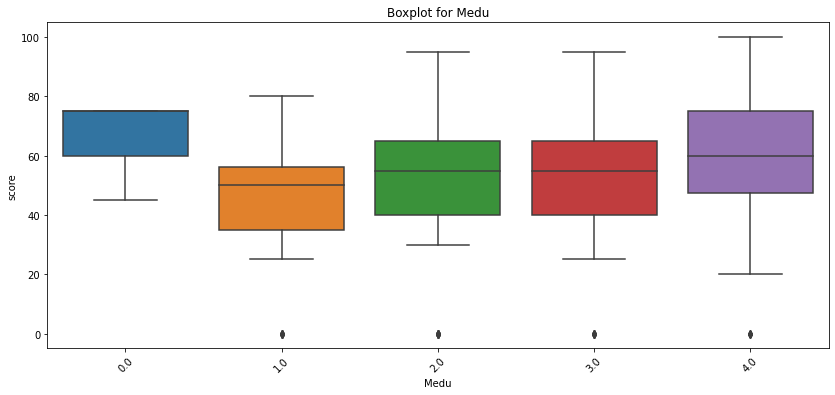

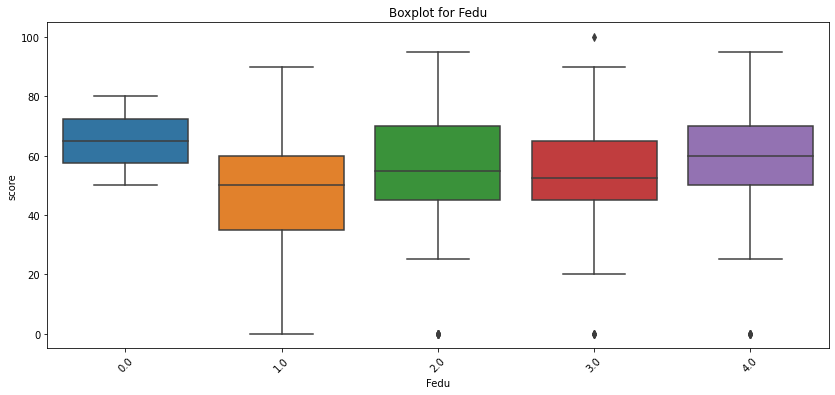

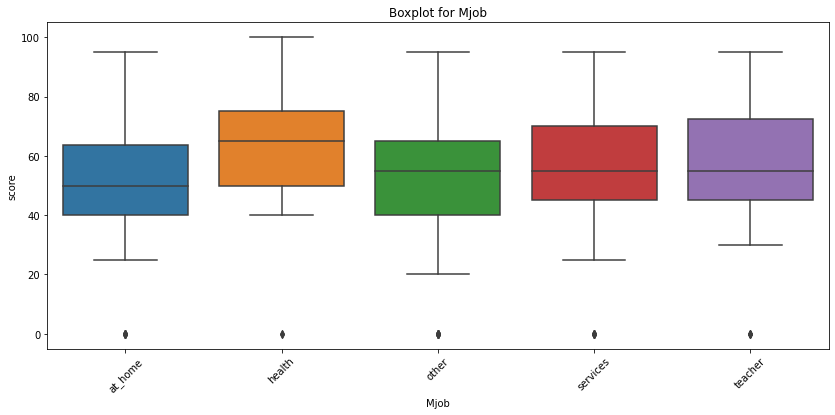

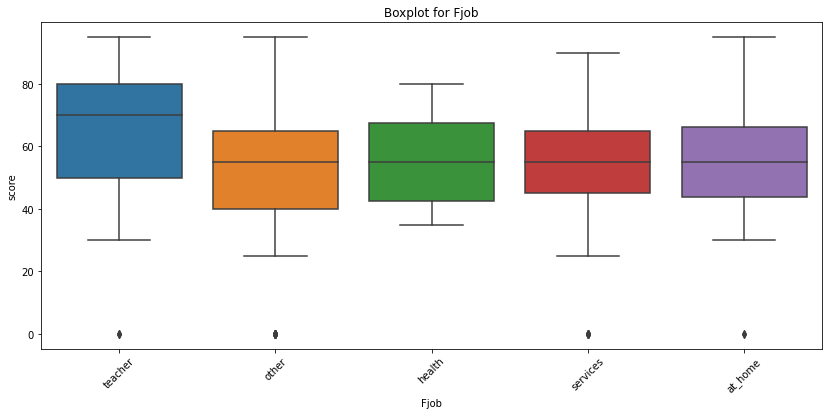

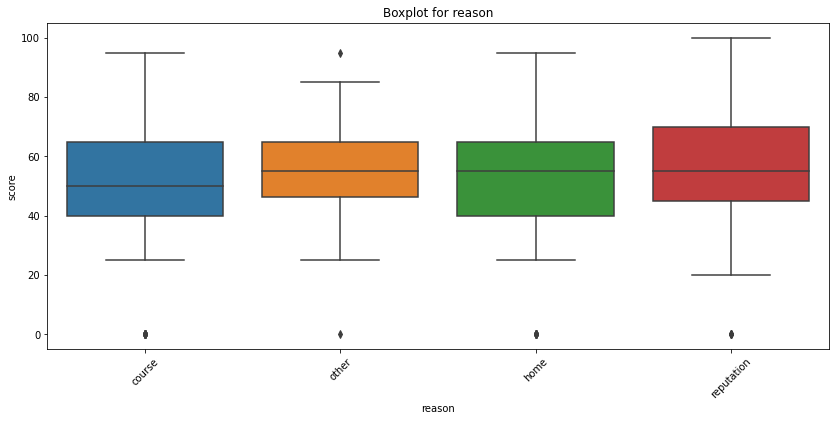

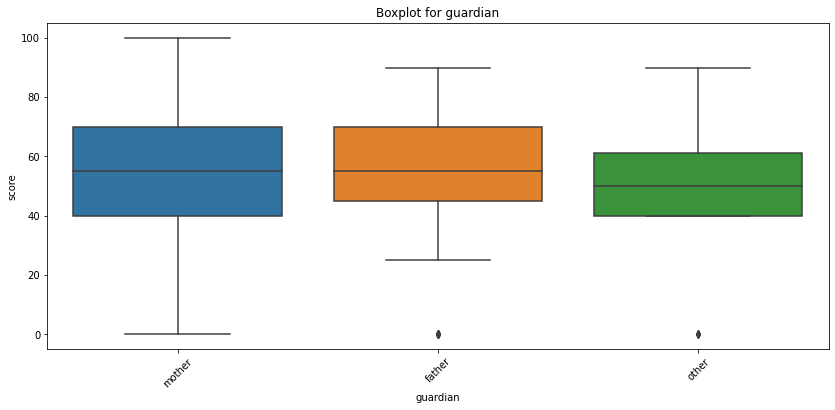

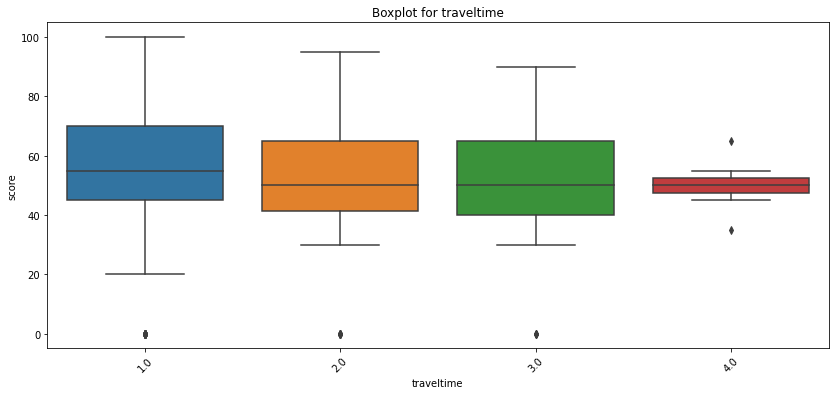

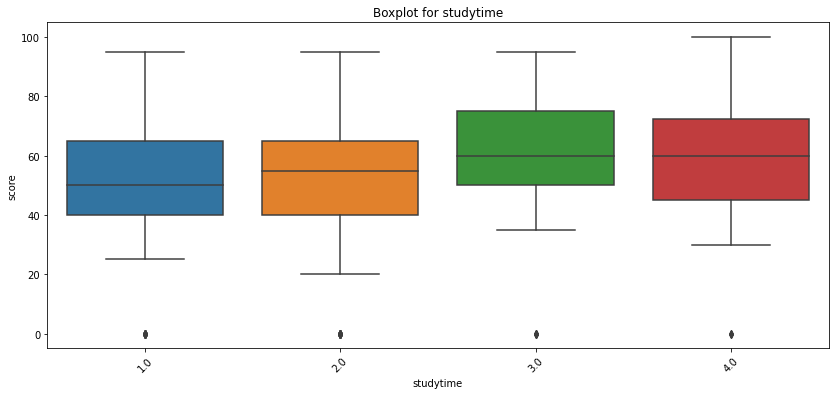

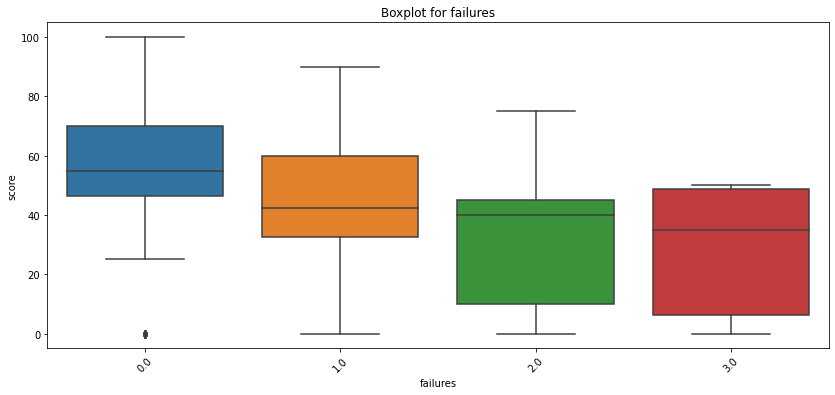

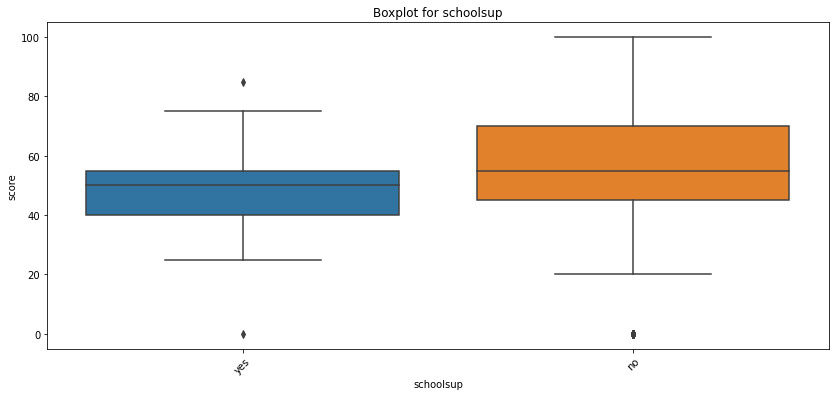

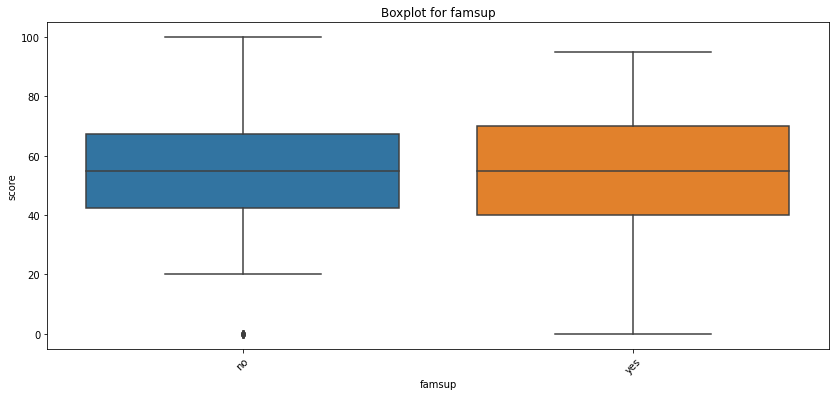

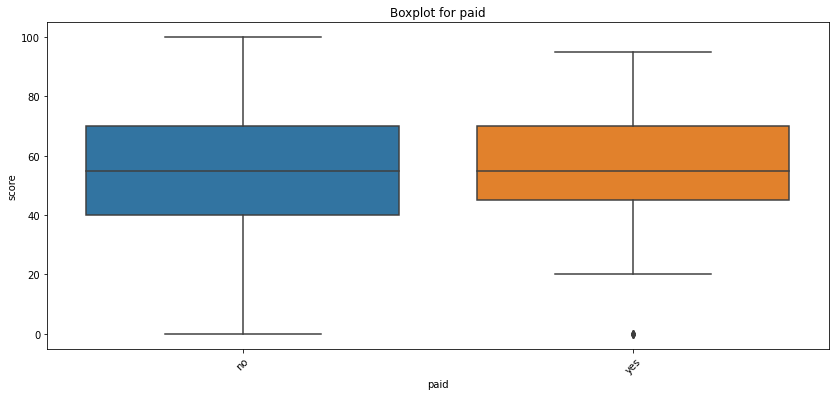

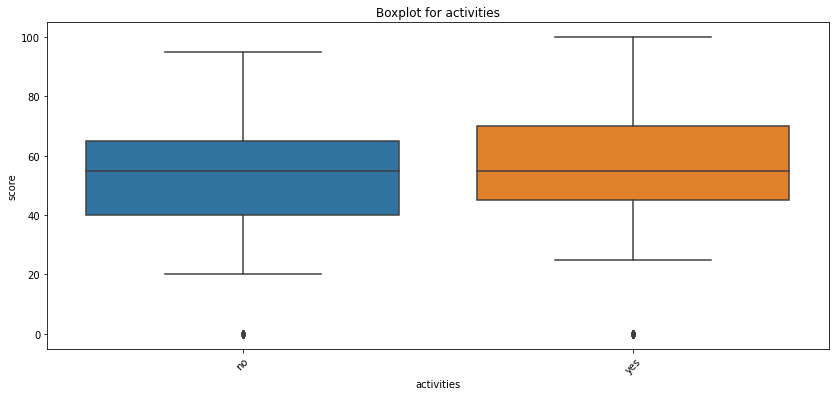

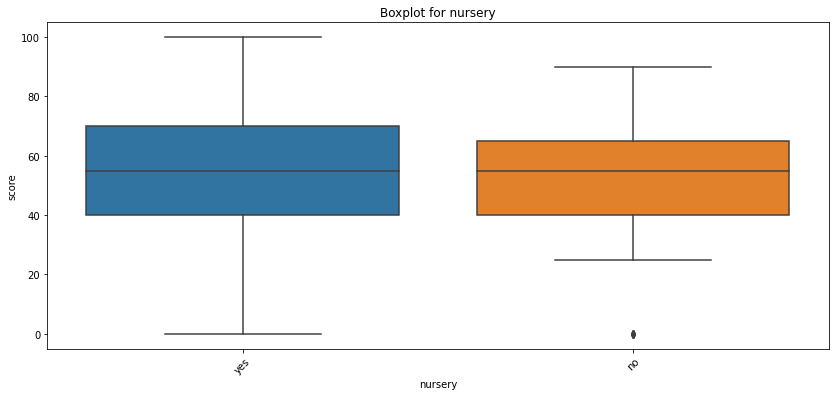

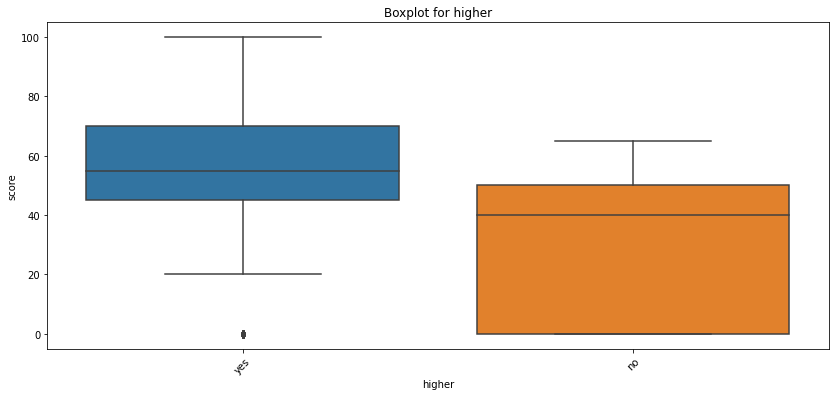

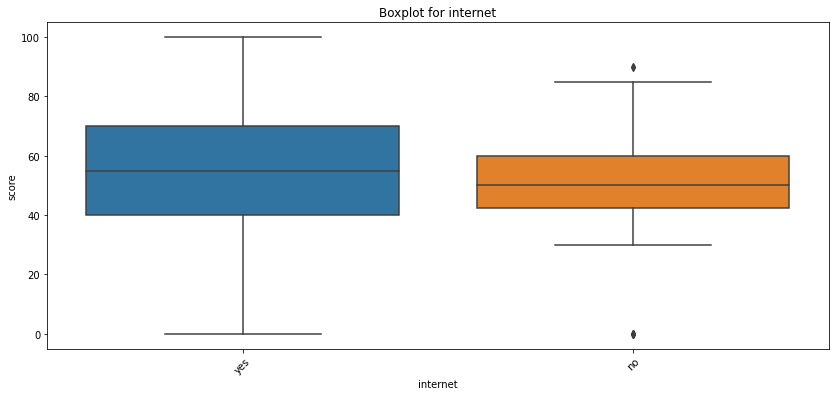

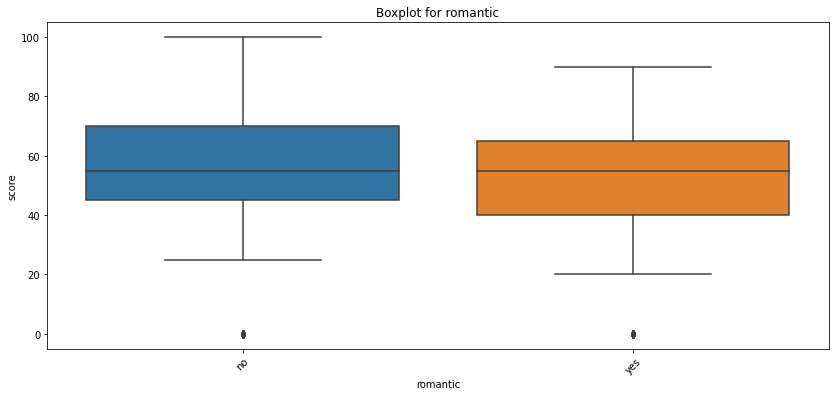

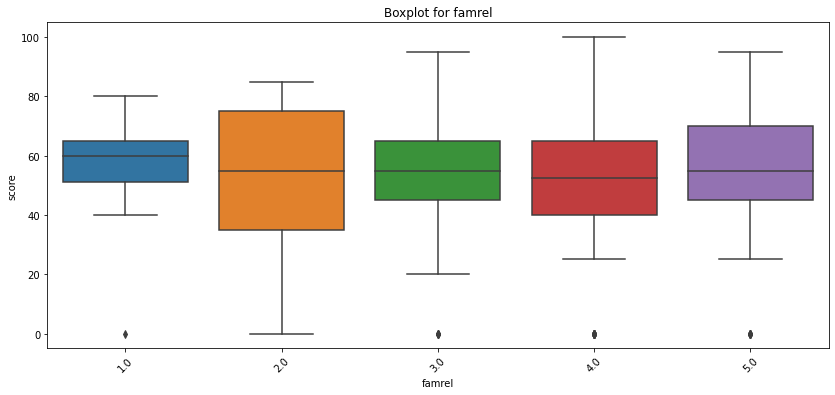

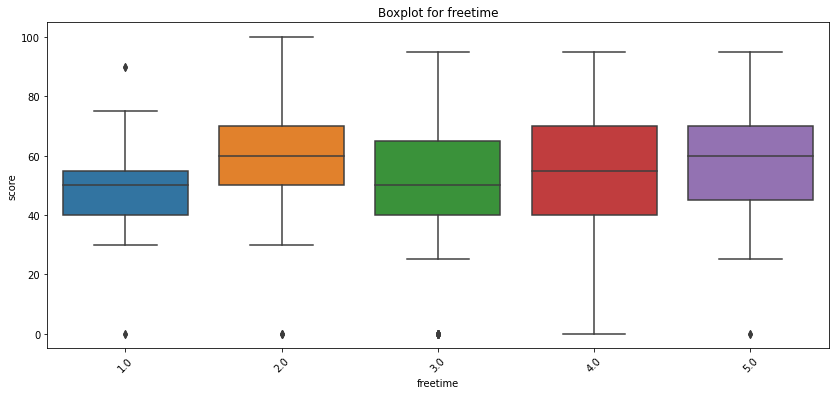

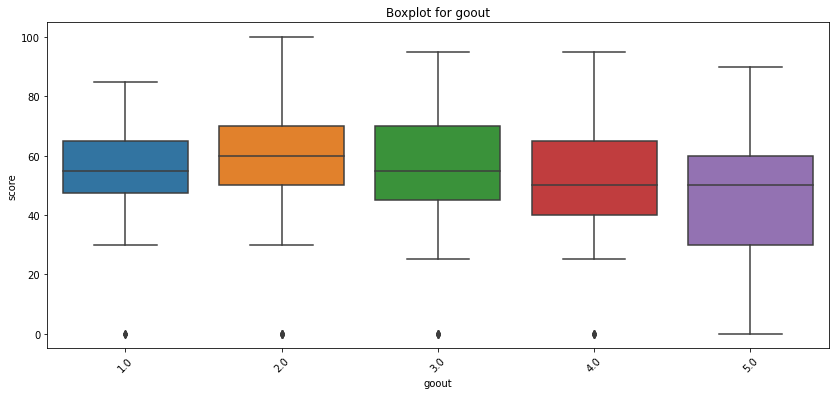

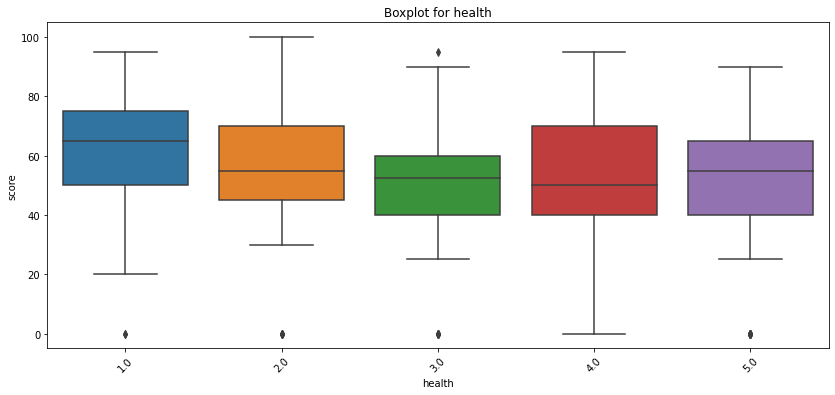

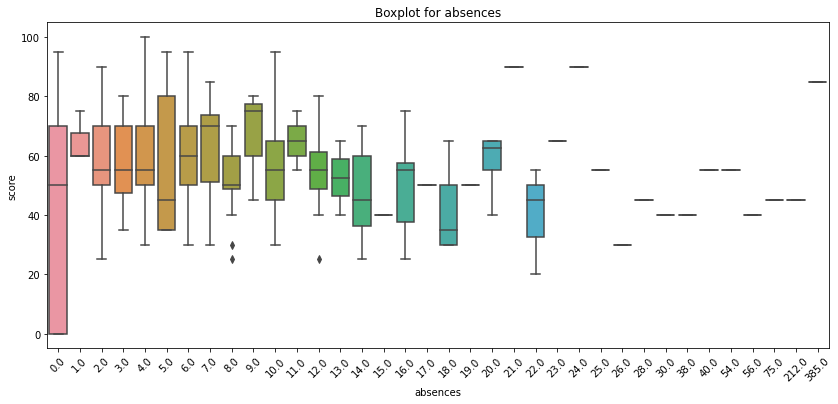

In [310]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
            'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout',
            'health', 'absences']:
    get_boxplot(col)

#### Визуальный анализ:


'school' - различий практически нет, у школы 'GP' показатели чуть лучше

'sex' - различий практически нет, у мужского пола чуть лучше

 'age' - 15...17 лет различий нет, после 17 успеваемость снижается до 19-ти лет включительно, и только в 20 лет успеваемость самая высокая. Но и самих 20-летних учеников мало. Наверное, в школе остаются самые мотивированные. 

 'address' - у городских учеников успеваемость выше

'famsize' - успеваемость не зависит от размера семьи

'Pstatus'- успеваемость не зависит отсовместного жилья родителей

'Medu' - как ни странно, успеваемость учеников, чьи матери не имеют образования, самая высокая. 5-9 классы - самая низкая. Различия и тенденция есть.

'Fedu' - аналогично 'Medu'. Различия и тенденция есть.

'Mjob' - самая высокая успеваемость у учеников, чьи матери работают в сфере здравоохранения. Существенное отличие от остальных. Все остальные профессии между собой на одном уровне, различий не показывают. Если мы вспомним цель  проекта UNICEF: на ранней стадии выявлять студентов, находящихся в группе риска по успеваемости? Из боксплота видно, что нет ни одной профессии матери, при которой успеваемость ниже остальных. Значит, этот показатель не являестя потенциальным источником риска, целесообразно ли его рассматривать дальше?

'Fjob' - у отцов-учителей успеваемость детей явно выше остальных. Остальные профессии между собой на одном уровне, различий не показывают. Вывод такой же, как и в приведенном выше анализе профессий матери: различия в одной профессии, целесообразность дальнейшего использования под вопросом. 

'reason' - различий практически нет

'guardian' - если опекун - не мать и не отец - успеваемость чуть хуже. Отличия малозначимые.

'traveltime' - различий практически нет

'studytime' - больше времени на уроки - лучше успеваемость, все логично. Различия есть. 

'failures' - больше неудач - хуже успеваемость, все логично. Различия есть.

'schoolsup' - без поддержки результаты лучше. Очевидно, что поддержку оказывают более слабым ученикам. Это скорее следствие, чем причина, поэтому этот показатель в дальнейшем рассматривать не будем.

'famsup' - различий практически нет

'paid' - различий практически нет

'activities' - различий практически нет, у активных вне школы учеников показатели чуть лучше.

'nursery' - различий практически нет

'higher' - явные отличия. У тех, кто хочет в ВУЗ - показатели выше, все логично.

'internet' - различий практически нет, с интерентом показатели чуть лучше.

'romantic' - некоторые различия, любовь отвлекает от учебы) 

'famrel'  - различий практически нет

'freetime' - совсем незначительный рост успеваемости с увеличением свободного времени. 

'goout' - незначительное снижение успеваемости с увеличением времени с друзьями. Возможно, ученики много гуляют в ущерб урокам? 

'health' - у учеников с проблемами со здоровьем успеваемость выше. Возможно, они не могут заниматься другими активностями и больше сконцентрированы на учебе? Различия есть.

'absences' - логично, что с увеличением прогулов снижается успеваемость. Но это заметно только после 12 прогулов. В диапазоне от 0 до 12 прогулы практически не влияют на результаты учебы. В целом, отрицательная тенденция видна.

#### Выводы по анализу боксплотов

Различия видны по показателям: 'age', 'address', 'Medu', 'Fedu', 'studytime', 'failures', 'romantic', 'higher', 'health', 'absences'

## Тест Стьюдента

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения показателя 'score' по различным параметрам неразличимы:

In [309]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(
            stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
            stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

Важно: код в нижестоящем блоке приходится запускать дважды - в первый раз выдает результаты, но показывает ошибку, потом нормальные результаты!  

In [305]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
            'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout',
            'health', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


Принимаем результаты теста Стьюдента в качестве основы для вывода:
статистически значимые различия есть у показателей: 'address', 'Medu', 'Mjob', 'failures', 'higher', 'romantic',  'goout'.

Оставим только эти переменные (и, конечно, целевую 'score') в датасете для дальнейшего построения модели: 

In [308]:
stud_for_model = stud_math.loc[:, ['address', 'Medu', 'Mjob', 'failures',
                                   'higher', 'romantic', 'goout', 'score']]
stud_for_model.head(50)

,address,Medu,Mjob,failures,higher,romantic,goout,score
0,U,4.0,at_home,0.0,yes,no,4.0,30.0
1,U,1.0,at_home,0.0,yes,no,3.0,30.0
2,U,1.0,at_home,3.0,yes,NaN,2.0,50.0
3,U,4.0,health,0.0,yes,yes,2.0,75.0
4,U,3.0,other,0.0,yes,no,2.0,50.0
5,U,4.0,services,0.0,yes,no,2.0,75.0
6,NaN,2.0,other,0.0,yes,no,4.0,55.0
7,U,4.0,other,0.0,yes,no,4.0,30.0
8,U,3.0,services,0.0,yes,no,2.0,95.0
9,U,3.0,other,0.0,yes,no,1.0,75.0


In [307]:
stud_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   address   374 non-null    object 
 1   Medu      386 non-null    float64
 2   Mjob      370 non-null    object 
 3   failures  367 non-null    float64
 4   higher    369 non-null    object 
 5   romantic  358 non-null    object 
 6   goout     382 non-null    float64
 7   score     389 non-null    float64
dtypes: float64(4), object(4)
memory usage: 37.4+ KB


## Итоговые выводы

Датасет относительно небольшой - 395 строк, 30 столбцов. 

Качество данных: 
- из 30-ти столбцов только три ('school', 'sex', 'age') не имели ни пропусков, ни выбросов. 
- Столбец 'studytime, granular' был удален как не имеющий смысла.
- Стобцы 'Fedu', 'Famrel', 'absences' имели выбросы.
- Во всех остальных столбцах были пропуски: от минимума в 3 пропуска ('Medu') до максимума в 45 пропусков ('Pstatus'), что много для небольшого датасета.

На основании анализа числовых и номинативных данных отобраны переменные для будущей модели, а именно:
- 'address',
- 'Medu',
- 'Mjob',
- 'failures',
- 'higher', 
- 'romantic', 
- 'goout',
- 'score' (целевой показатель)

Датафрейм с вышеуказанными показателями сохранен в переменную stud_for_model

## Комментарий:

Не получилось воспользоваться библиотекой autopep8. В Анаконде она есть, но вызвать не получилось. В меню 'Edit' не было вкладки  'nbextentions config'. Через терминал тоже не получилось. Поэтому форматировал код самостоятельно.

Не удалял пропуски nan. Это сократит и так небольшой датасет. А чем их заполнять (средними значениями или еще чем) - не знаю. Наверное, это будет понятно из требований к будущей модели и ее особенностей.

Не удалял выбросы в столбце 'absences', так как он не будет применяться в будущей модели.